# Bootcamp Sesión 3 
### Regresión Logistica | Métricas de Validación | Árboles de Decisión | SVM | Proceso General de ML
Septiembre 2024


In [1]:
#conda install scikit-learn

### Aprendizaje Supervisado: Definición
El aprendizaje supervisado es un enfoque de machine learning en el que el modelo se entrena con un conjunto de datos etiquetados. Esto significa que el algoritmo recibe tanto las entradas como las salidas deseadas durante el entrenamiento. El objetivo es que el modelo aprenda una función que mapee las entradas a las salidas, para que luego pueda predecir correctamente las salidas de nuevas entradas no vistas.

Los dos tipos principales de problemas de aprendizaje supervisado son:

Clasificación: Se predice una etiqueta categórica. Ejemplo: Clasificar correos como spam o no spam.
Regresión: Se predice un valor numérico. Ejemplo: Predecir el precio de una casa.

#### Tema 1: Regresión Logística

La **regresión logística** es un algoritmo de aprendizaje supervisado utilizado para problemas de clasificación binaria (aunque también puede extenderse a problemas multiclase). A pesar de su nombre, no es un modelo de regresión en el sentido clásico, sino un modelo de clasificación. Este algoritmo se utiliza para predecir la probabilidad de que una instancia pertenezca a una de las dos clases posibles.

En lugar de predecir valores continuos como lo hace la **regresión lineal**, la regresión logística predice probabilidades. La función que convierte la salida de la regresión en una probabilidad se denomina **función sigmoide** o **logística**

##### Proceso de la Regresión Logística:

1. **Modelo Lineal**: Al igual que en la regresión lineal, se calcula una combinación lineal de las características de entrada

2. **Función Sigmoide**: Se pasa esta combinación lineal por la función sigmoide para obtener una probabilidad:

Esta probabilidad se utiliza para predecir la clase. Si la probabilidad es mayor o igual a 0.5, se asigna la clase positiva (1); de lo contrario, se asigna la clase negativa (0).



In [2]:
# Importar librerías necesarias
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar el dataset Breast Cancer
data = load_breast_cancer()
X = data.data  # Características
y = data.target  # Clases: 0 (Benigno), 1 (Maligno)


In [3]:
## Revisar dataset

In [6]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [7]:
col_names = data['feature_names']

In [8]:
df = pd.DataFrame(data['data'], columns=col_names)

In [9]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [10]:

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos para normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de regresión logística
logreg = LogisticRegression()

# Entrenar el modelo
logreg.fit(X_train_scaled, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = logreg.predict(X_test_scaled)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9824561403508771

Confusion Matrix:
 [[ 62   1]
 [  2 106]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [20]:
z = logreg.predict(X_test_scaled[1].reshape(1, -1))

In [21]:
z

array([0])

#### Tema 2: Métricas de Validación para Modelos de Clasificación

Cuando entrenamos un modelo de clasificación, es esencial evaluar su rendimiento utilizando métricas adecuadas. A continuación se describen algunas de las métricas más importantes:

##### 1. Matriz de Confusión

La **matriz de confusión** es una tabla que resume el rendimiento del modelo de clasificación. Contiene las siguientes entradas para un problema de clasificación binaria:

- Verdaderos Positivos (TP): El modelo predice correctamente la clase positiva.
- Falsos Positivos (FP): El modelo predice la clase positiva incorrectamente.
- Verdaderos Negativos (TN): El modelo predice correctamente la clase negativa.
- Falsos Negativos (FN): El modelo predice la clase negativa incorrectamente.

|                | Clase Positiva (Pred) | Clase Negativa (Pred) |
|----------------|-----------------------|-----------------------|
| **Clase Positiva (Real)** | TP                    | FN                    |
| **Clase Negativa (Real)** | FP                    | TN                    |

##### 2. Precisión (Accuracy)

La precisión mide la proporción de predicciones correctas sobre el total de predicciones realizadas:

$$
\text{Precisión} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Aunque es útil en muchos casos, puede no ser confiable cuando las clases están desbalanceadas.

###### 3. Precisión (Precision)

La precisión mide qué proporción de las predicciones positivas fueron realmente correctas:

$$
\text{Precisión} = \frac{TP}{TP + FP}
$$

Es útil cuando el costo de un **falso positivo** es alto.

##### 4. Exhaustividad (Recall)

La exhaustividad (también conocida como **sensibilidad** o **recall**) mide qué proporción de los verdaderos positivos fueron correctamente identificados:

$$
\text{Exhaustividad} = \frac{TP}{TP + FN}
$$

Es útil cuando el costo de un **falso negativo** es alto.

##### 5. Puntuación F1 (F1-Score)

La puntuación F1 es la media armónica de la precisión y la exhaustividad. Es útil cuando se necesita un equilibrio entre precisión y recall:

$$
\text{F1} = 2 \times \frac{\text{Precisión} \times \text{Exhaustividad}}{\text{Precisión} + \text{Exhaustividad}}
$$

##### 6. AUC-ROC (Area Under the Curve - Receiver Operating Characteristic)

El **AUC-ROC** es una métrica que mide la capacidad de un modelo para discriminar entre clases. La curva ROC grafica la **tasa de verdaderos positivos** (recall) frente a la **tasa de falsos positivos**:

- **AUC (Área Bajo la Curva)**: Un valor de AUC cercano a 1 indica un modelo que discrimina bien entre clases, mientras que un valor cercano a 0.5 indica un modelo que no lo hace mejor que un modelo aleatorio.




#### Tema 3: Árboles de Decisión

Un **árbol de decisión** es un algoritmo de aprendizaje supervisado que se utiliza tanto para problemas de clasificación como de regresión. El modelo tiene una estructura de árbol, donde los nodos internos representan una prueba sobre una característica, las ramas representan el resultado de esa prueba, y las hojas representan etiquetas de clase (en el caso de clasificación) o valores (en el caso de regresión).

##### Estructura del Árbol

1. **Nodo Raíz**: El nodo superior del árbol. Representa la primera prueba sobre una característica.
2. **Nodos Internos**: Los nodos que dividen los datos en diferentes ramas en función de una característica específica.
3. **Hojas**: Los nodos terminales que contienen las predicciones (en clasificación, las clases; en regresión, los valores predichos).

##### Algoritmo de Construcción

El árbol de decisión divide el espacio de características en subconjuntos en cada nodo, utilizando criterios de división como:

##### 1. Criterio de Impureza (para clasificación)
Para determinar la mejor división en un nodo, se utilizan métricas de impureza como:

- **Entropía**:
  
$$
\text{Entropía} = - \sum_{i=1}^{C} p_i \log_2(p_i)
$$

Donde \( p_i \) es la proporción de elementos de la clase \( i \), y \( C \) es el número total de clases.

- **Índice Gini**:

$$
\text{Índice Gini} = 1 - \sum_{i=1}^{C} p_i^2
$$

##### 2. Criterio de Error (para regresión)

En el caso de regresión, el criterio de división suele ser minimizar la **suma de los errores al cuadrado** (SSE):

$$
\text{SSE} = \sum_{i=1}^{n} (y_i - \hat{y})^2
$$

Donde:
- \( y_i \) es el valor real.
- \( \hat{y} \) es el valor predicho.
- \( n \) es el número de ejemplos.

##### Ventajas

- **Interpretabilidad**: Los árboles de decisión son fáciles de interpretar visualmente.
- **Manejo de Características Categóricas y Numéricas**: Puede manejar ambos tipos de características sin necesidad de normalización.

##### Desventajas

- **Propenso al Sobreajuste**: Los árboles de decisión tienden a sobreajustar los datos si no se podan o si no se establece una profundidad máxima.
- **Inestabilidad**: Un pequeño cambio en los datos puede dar lugar a un árbol completamente diferente.




In [22]:
# Importar librerías necesarias
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

# Cargar el dataset Iris
iris = load_iris()
X = iris.data  # Características
y = iris.target  # Clases

In [23]:
col_names = data['feature_names']
df = pd.DataFrame(data['data'], columns=col_names)
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



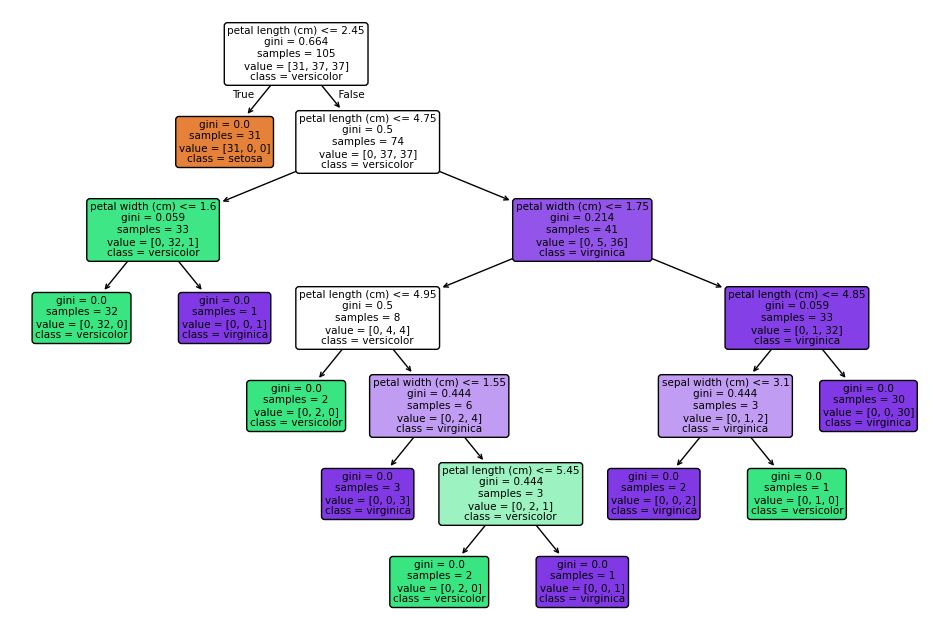

In [21]:

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de árbol de decisión
dtree = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
dtree.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = dtree.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualización del árbol
plt.figure(figsize=(12,8))
tree.plot_tree(dtree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()
     

#### Tema 4: Máquinas de Vectores de Soporte (SVM)

Las **Máquinas de Vectores de Soporte (SVM)** son un poderoso algoritmo de aprendizaje supervisado utilizado tanto para problemas de **clasificación** como de **regresión**. Sin embargo, las SVM son más comúnmente conocidas por su aplicación en problemas de clasificación binaria.

##### Concepto Básico

El objetivo de las SVM es encontrar un **hiperplano** que divida el espacio de características de tal manera que los datos de diferentes clases queden separados. En otras palabras, SVM encuentra la línea (o hiperplano en dimensiones superiores) que maximiza la **margen** entre las dos clases.

##### Hiperplano y Margen

- **Hiperplano**: Es una frontera de decisión que separa las diferentes clases. En un problema con \( n \) características, el hiperplano es un subespacio de \( n-1 \) dimensiones.
  
- **Margen**: Es la distancia entre el hiperplano y los puntos más cercanos de cada clase, llamados **vectores de soporte**. El objetivo de las SVM es maximizar este margen para lograr una mayor separación entre las clases.

##### Función de Decisión

La ecuación del hiperplano en una SVM es:

$$
\mathbf{w} \cdot \mathbf{x} + b = 0
$$

Donde:
- \( \mathbf{w} \) es el vector de pesos.
- \( \mathbf{x} \) son las características de los datos.
- \( b \) es el término de sesgo (bias).

##### Función de Costo (Hinge Loss)

La función de costo utilizada en SVM es conocida como **Hinge Loss**:

$$
L(\mathbf{w}) = \sum_{i=1}^{n} \max(0, 1 - y_i (\mathbf{w} \cdot \mathbf{x_i} + b))
$$

Donde:
- \( y_i \) es la etiqueta de la clase (+1 o -1).
- \( \mathbf{x_i} \) es el conjunto de características de la instancia \( i \)-ésima.
- \( \mathbf{w} \cdot \mathbf{x_i} + b \) es la función de decisión.

##### Ventajas de las SVM sobre Otros Algoritmos

##### 1. **Margen Máximo y Generalización**

Una de las principales ventajas de las SVM es que maximizan el **margen** entre las clases, lo que les permite generalizar mejor en datos no vistos en comparación con otros algoritmos como la regresión logística. Al centrarse solo en los **vectores de soporte**, las SVM son más robustas ante outliers en los datos.

##### 2. **Capacidad de Trabajar en Espacios de Alta Dimensión**

Las SVM son especialmente útiles en problemas donde el número de características es mayor que el número de ejemplos, como en los problemas de texto o genómica. Mientras que otros algoritmos pueden tener dificultades en este tipo de problemas, las SVM son muy eficientes.

##### 3. **Trata el Problema de No Linealidad con el Truco del Kernel**

Otra gran ventaja es que las SVM pueden abordar problemas donde las clases no son linealmente separables. Esto se logra utilizando el **truco del kernel**, que transforma los datos a un espacio de mayor dimensión donde las clases sí sean separables. Los kernels más comunes son:

- **Kernel Lineal**: Útil para datos linealmente separables.
  
$$
K(\mathbf{x}, \mathbf{x'}) = \mathbf{x} \cdot \mathbf{x'}
$$

- **Kernel RBF (Radial Basis Function)**: Para datos no linealmente separables.
  
$$
K(\mathbf{x}, \mathbf{x'}) = \exp(-\gamma \|\mathbf{x} - \mathbf{x'}\|^2)
$$

##### 4. **Eficiencia en Memoria**

SVM es eficiente en términos de memoria, ya que solo utiliza los **vectores de soporte** (los puntos de datos más cercanos al hiperplano de decisión) para construir el modelo. Esto lo hace menos propenso a sobreajustar y reduce la cantidad de memoria necesaria en comparación con algoritmos como los árboles de decisión, que pueden crecer muy grandes.

##### 5. **Versatilidad**

Las SVM son muy versátiles y pueden ser aplicadas tanto a problemas de clasificación binaria como a multiclase (utilizando técnicas como One-vs-One o One-vs-Rest). Además, las SVM pueden ser utilizadas para problemas de regresión utilizando **SVR (Support Vector Regression)**.


#### Desventajas

- **Escalabilidad**: Las SVM pueden ser ineficientes en grandes conjuntos de datos, especialmente en aquellos con un gran número de ejemplos, ya que el tiempo de entrenamiento crece cuadráticamente con el tamaño del dataset.
  
- **Elección del Kernel**: Elegir el kernel adecuado y ajustar sus hiperparámetros puede ser complicado y requiere validación cruzada.




In [24]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Cargar el dataset Iris
iris = load_iris()
X = iris.data  # Características
y = iris.target  # Clases

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos para mejorar el rendimiento del SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de SVM con kernel RBF (Radial Basis Function)
svm = SVC(kernel='rbf', gamma='scale', random_state=42)

# Entrenar el modelo
svm.fit(X_train_scaled, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = svm.predict(X_test_scaled)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#### Tema 5: Proceso General 

## 1. Recolección de Datos

El primer paso en cualquier proyecto de machine learning es la **recolección de datos**. Los datos pueden ser obtenidos de varias fuentes, como archivos CSV, bases de datos SQL, APIs, datasets públicos, entre otros. Los datos son la base de todo el proceso, y su calidad es crucial para el éxito del modelo.

## 2. Análisis y Preprocesamiento de Datos

Una vez que tenemos los datos, el siguiente paso es **analizarlos** y **preprocesarlos**. Esto implica:

- **Exploración de datos**: Analizar la estructura de los datos, entender las variables, revisar distribuciones, buscar outliers y detectar valores faltantes.
- **Manejo de valores faltantes**: Llenar o eliminar datos faltantes.
- **Codificación de variables categóricas**: Convertir variables categóricas en variables numéricas utilizando técnicas como **one-hot encoding** o **label encoding**.
- **Escalado o normalización**: Escalar características numéricas para que tengan la misma escala (por ejemplo, usando StandardScaler o MinMaxScaler).
- **División del dataset en características y etiquetas**.


## 3. División del Conjunto de Datos (Train/Test Split)

El siguiente paso es dividir el conjunto de datos en dos partes: **conjunto de entrenamiento** y **conjunto de prueba**. El conjunto de entrenamiento se utiliza para entrenar el modelo, mientras que el conjunto de prueba se utiliza para evaluar su rendimiento en datos no vistos.

La proporción comúnmente utilizada es 80% para entrenamiento y 20% para prueba.

## 4. Selección del Modelo

En este punto, seleccionamos el **algoritmo de machine learning** adecuado según el tipo de problema (clasificación, regresión, clustering, etc.). Los algoritmos populares incluyen:

- **Regresión Lineal/Logística** para problemas de regresión o clasificación binaria.
- **Árboles de Decisión** y **Random Forest** para problemas de clasificación o regresión.
- **SVM** para problemas de clasificación.
- **Redes Neuronales** para tareas complejas de clasificación y regresión.


## 5. Entrenamiento del Modelo

Una vez que hemos seleccionado el algoritmo, entrenamos el modelo utilizando el conjunto de entrenamiento. Este es el proceso donde el modelo "aprende" de los datos ajustando sus parámetros internos.


## 6. Evaluación del Modelo

Después de entrenar el modelo, es crucial **evaluarlo** para entender qué tan bien se desempeña en el conjunto de prueba. Dependiendo del tipo de problema, utilizamos diferentes métricas para evaluar el rendimiento:

- **Precisión (accuracy)**, **recall**, **precisión** y **F1-score** para clasificación.
- **Error cuadrático medio (MSE)** o **R²** para regresión.


## 7. Optimización del Modelo

Después de evaluar el modelo, es posible que queramos mejorar su rendimiento. Las técnicas de optimización incluyen:

- **Ajuste de hiperparámetros**: Usar técnicas como **Grid Search** o **Random Search** para encontrar los mejores hiperparámetros del modelo.
- **Validación cruzada**: Dividir los datos en varios subconjuntos y entrenar el modelo múltiples veces para garantizar que el modelo generaliza bien a diferentes muestras del conjunto de datos.
- **Regularización**: Aplicar penalizaciones a los parámetros del modelo para evitar el sobreajuste.


## 8. Despliegue del Modelo

Una vez que el modelo ha sido optimizado y validado, se puede **desplegar** en un entorno de producción para hacer predicciones sobre datos nuevos en tiempo real. Esto generalmente implica:

- **Guardado del modelo**: Serializar el modelo entrenado en un archivo (por ejemplo, utilizando `joblib` o `pickle`).
- **Creación de una API** para que el modelo pueda recibir nuevas instancias de datos y devolver predicciones.

